In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
weather = pd.read_csv('full_ak.csv')

In [4]:
cnx = sqlite3.connect('/home/nate/Desktop/fires/FPA_FOD_20170508.sqlite')

In [5]:
df = pd.read_sql_query("SELECT STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", cnx)

In [6]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [7]:
len(df)

1880465

In [8]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name

In [9]:
df.head()

,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,YEAR,DAY_OF_WEEK
0,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,2005,Wednesday
1,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,2004,Wednesday
2,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,2004,Monday
3,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,2004,Monday
4,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,2004,Monday


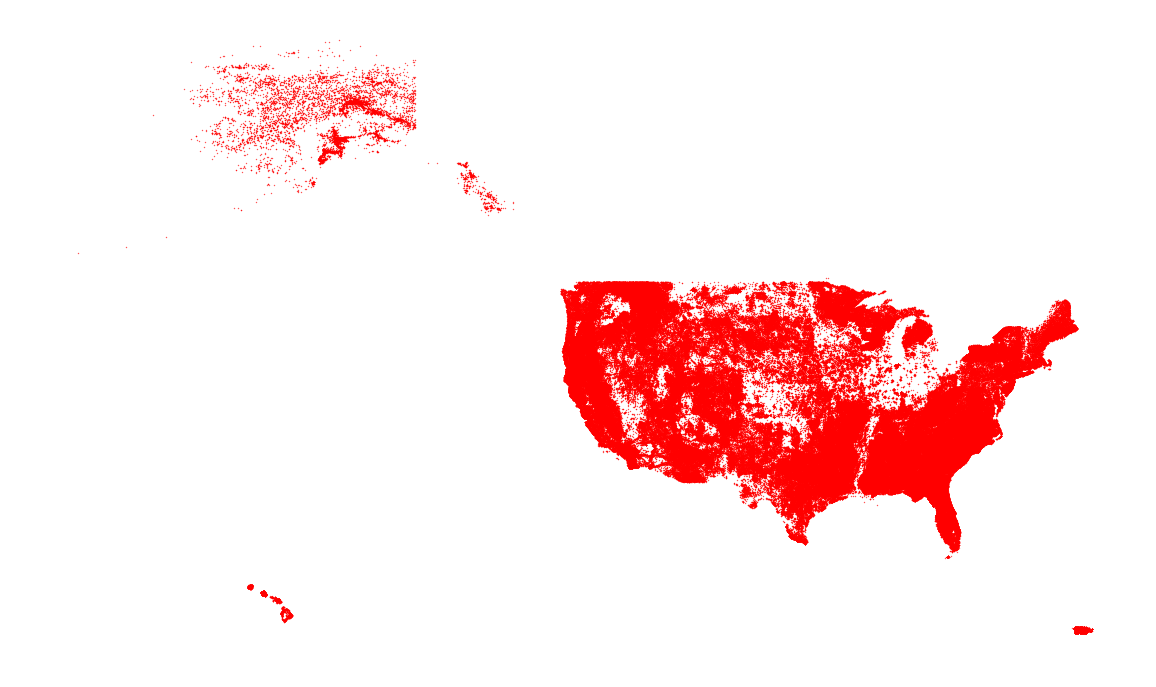

In [10]:
plt.figure(figsize=(20,12))

x=df['LONGITUDE']
y=df['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)
plt.axis('off')
plt.show()

In [11]:
df_over10 = df[df['FIRE_SIZE'] > 100]

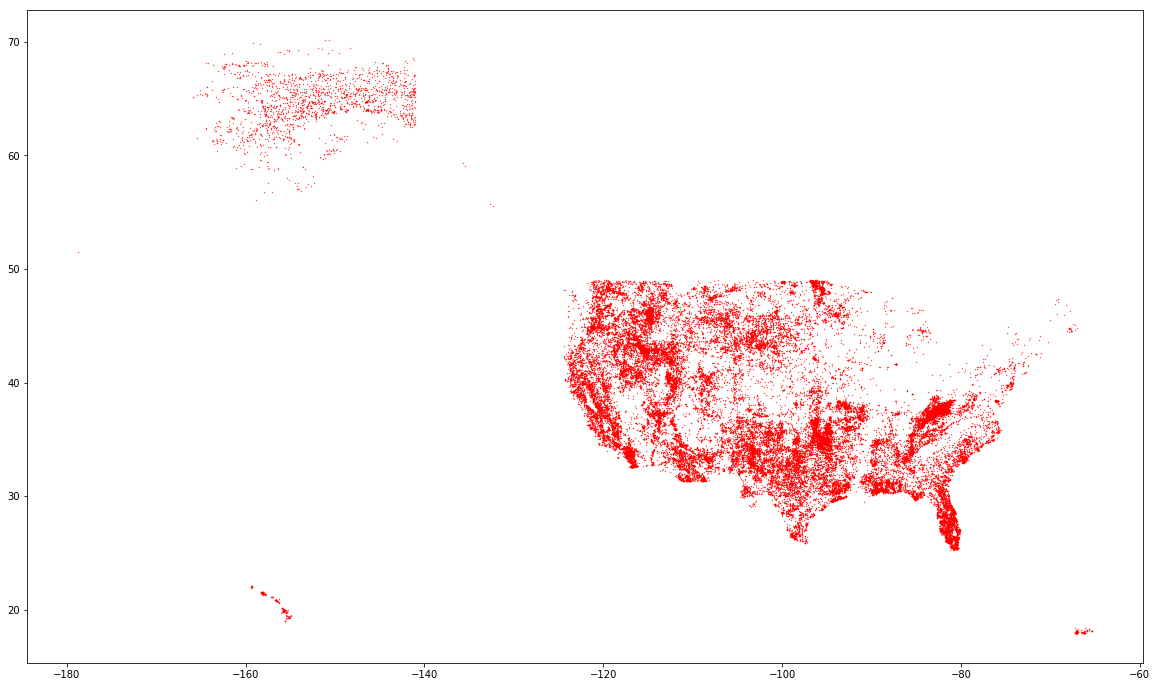

In [12]:
plt.figure(figsize=(20,12))

x=df_over10['LONGITUDE']
y=df_over10['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

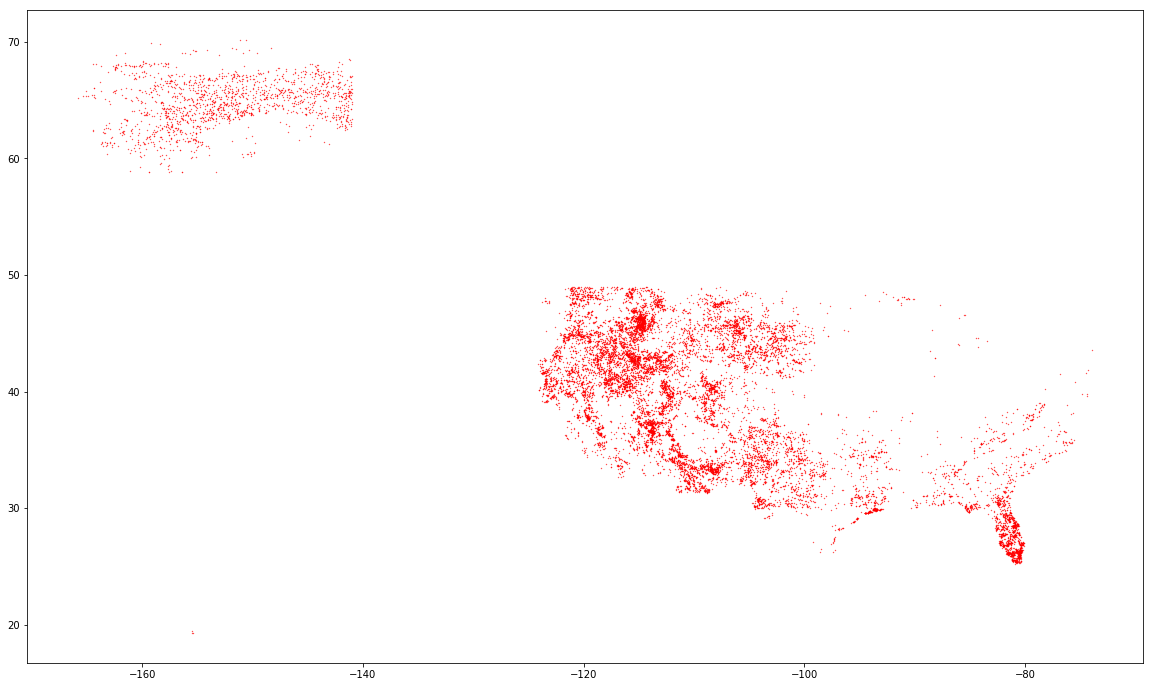

In [13]:
plt.figure(figsize=(20,12))

x=df_over10[df_over10['STAT_CAUSE_DESCR'] == 'Lightning']['LONGITUDE']
y=df_over10[df_over10['STAT_CAUSE_DESCR'] == 'Lightning']['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

# Stations

In [14]:
stations = pd.read_pickle('murica_stations.pkl')

In [15]:
# stations.to_csv('/home/nate/Desktop/fires/AWS/stations.csv')

In [16]:
# stations = pd.read_csv('/home/nate/Desktop/fires/stations.csv', delim_whitespace=True, names=[0])

# stations['idx'] = stations.index
# stations.head()

# stations.iloc[0][1][0]

# code = []
# lat = []
# lon = []
# for idx, row in stations.iterrows():
#     code.append(row[1][0])
#     lat.append(row[1][1])
#     lon.append(row[1][2])

# clean_stations = pd.DataFrame(code, columns=['code'])

# clean_stations['lat'] = lat
# clean_stations['lon'] = lon

# clean_stations.head()

# plt.figure(figsize=(20,12))

# x=clean_stations['lon']
# y=clean_stations['lat']

# plt.scatter(x,y,color='g',s=0.1)

# plt.show()

# accept_stations = []

# for idx, row in clean_stations.iterrows():
#     if row[2] < -60:
#         if row[1] > 15:
#             accept_stations.append(idx)
#     else:
#         pass

# len(accept_stations)

# murica_stations = pd.DataFrame(columns=['code', 'lat', 'lon'])

# murica_lon = []
# murica_lat = []
# murica_code = []

# for idx, row in clean_stations.iterrows():
#     if idx in accept_stations:
#         murica_lon.append(clean_stations.iloc[idx][2])
#         murica_lat.append(clean_stations.iloc[idx][1])
#         murica_code.append(clean_stations.iloc[idx][0])

# len(murica_lon)

# murica_stations['code'] = murica_code
# murica_stations['lat'] = murica_lat
# murica_stations['lon'] = murica_lon

# len(murica_stations)

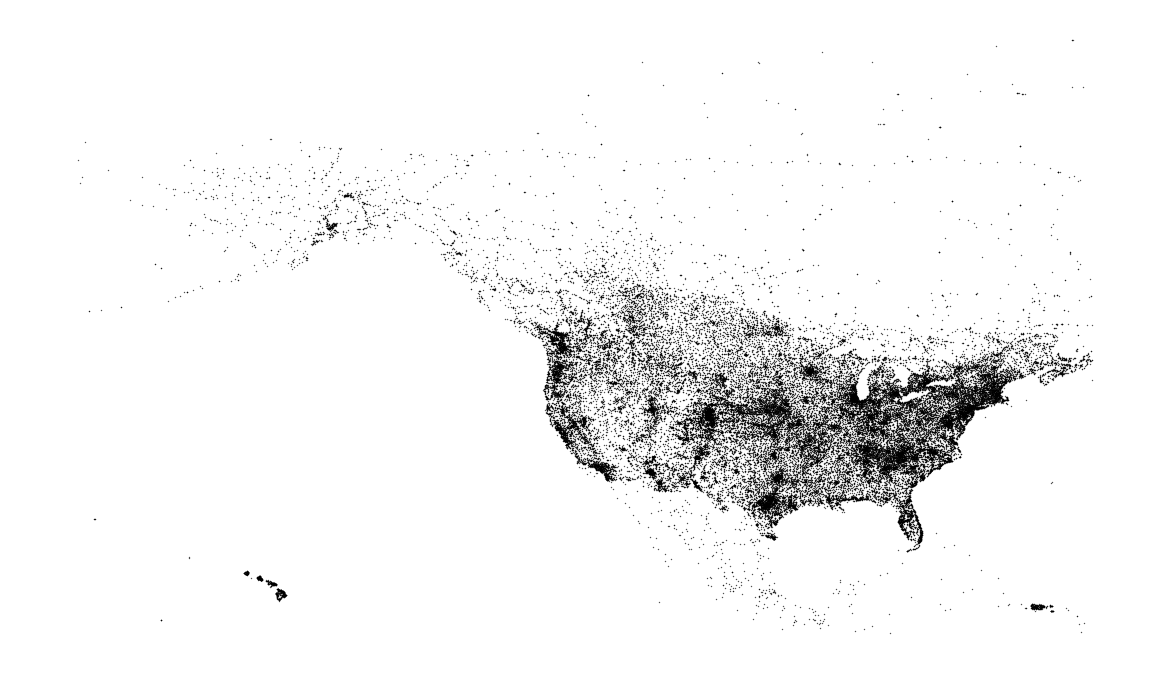

In [17]:
plt.figure(figsize=(20,12))

x=stations['lon']
y=stations['lat']

plt.scatter(x,y,color='k',s=0.1)
plt.axis('off')
plt.show()

In [18]:
stations.head()

,code,lat,lon
0,ACW00011604,17.1167,-61.7833
1,ACW00011647,17.1333,-61.7833
2,BDM00078016,32.3667,-64.6833
3,BDW00013602,32.2667,-64.8500
4,BF000078073,25.0500,-77.4670


# More Fire

In [19]:
df_orig = df.copy()
df_orig.columns

Index(['STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE', 'STATE', 'DISCOVERY_DATE',
       'FIRE_SIZE', 'DATE', 'MONTH', 'YEAR', 'DAY_OF_WEEK'],
      dtype='object')

In [20]:
print(df_orig[df_orig['FIRE_SIZE']>100]['FIRE_SIZE'].count()/df_orig['FIRE_SIZE'].count())
print(df_orig[df_orig['FIRE_SIZE']>100]['FIRE_SIZE'].sum()/df_orig['FIRE_SIZE'].sum())

0.026481216082192435
0.9371674356208397


In [21]:
plt_df = df_orig[df_orig['STATE'] == 'AK']

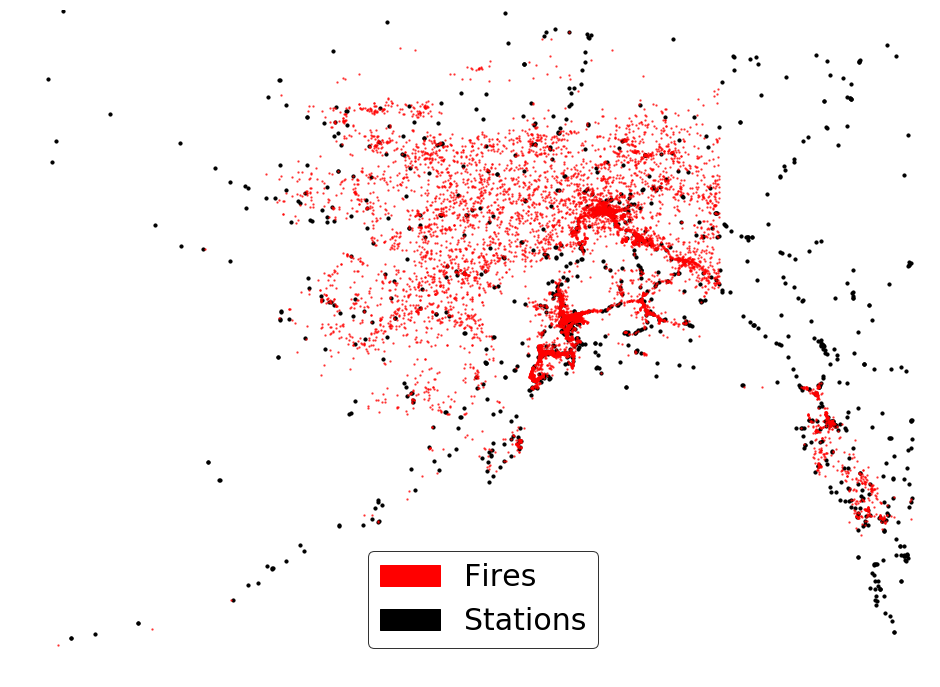

In [25]:
plt.figure(figsize=(16,12))

x=plt_df['LONGITUDE']
y=plt_df['LATITUDE']

x1=stations[(stations['lon']<-130)&(stations['lat']>50)]['lon']
y1=stations[(stations['lon']<-130)&(stations['lat']>50)]['lat']

plt.scatter(x1,y1,color='k', s=10, alpha=1, label='stations')
plt.scatter(x,y,color='r',s=2,alpha=.6, label='fires')

plt.axis('off')

red_patch = mpatches.Patch(color='r', label='Fires')
black_patch = mpatches.Patch(color='k', label='Stations')
plt.legend(handles=[red_patch, black_patch], loc=8, prop={'size': 30}, edgecolor='k')

plt.xlim(-180, -129)
plt.ylim(51, 71)

plt.show()

In [22]:
plt_df['FIRE_SIZE'].count()/df_orig['FIRE_SIZE'].count()

0.006829693719372602

In [23]:
plt_df['FIRE_SIZE'].sum()/df_orig['FIRE_SIZE'].sum()

0.23001860984539838

In [24]:
len(plt_df[plt_df['STAT_CAUSE_DESCR']=='Lightning'])/len(plt_df)

0.3198629603675154

In [25]:
plt_df[plt_df['STAT_CAUSE_DESCR']=='Lightning']['FIRE_SIZE'].sum()/plt_df['FIRE_SIZE'].sum()

0.9408963025493277

In [26]:
len(plt_df[plt_df['FIRE_SIZE']>100])/len(plt_df)

0.13789613018765087

In [27]:
plt_df[plt_df['FIRE_SIZE']>100]['FIRE_SIZE'].sum()/plt_df['FIRE_SIZE'].sum()

0.9985773953423323

In [28]:
df_orig[(df_orig['STATE']=='AK')&(df_orig['YEAR']==2015)&(df_orig['MONTH']==5)&(df_orig['FIRE_SIZE']>100)]

,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,YEAR,DAY_OF_WEEK
1796163,Missing/Undefined,64.700000,-146.58190,AK,2457147.5,743.0,2015-05-05,5,2015,Tuesday
1796164,Missing/Undefined,64.675000,-146.56890,AK,2457147.5,124.2,2015-05-05,5,2015,Tuesday
1796165,Missing/Undefined,64.713600,-146.45810,AK,2457149.5,1340.9,2015-05-07,5,2015,Thursday
1796343,Lightning,64.900000,-141.38330,AK,2457166.5,2902.3,2015-05-24,5,2015,Sunday
1796346,Lightning,64.362800,-142.29420,AK,2457166.5,372.0,2015-05-24,5,2015,Sunday
1796347,Lightning,65.100000,-141.63000,AK,2457166.5,263.6,2015-05-24,5,2015,Sunday
1796359,Campfire,65.714400,-144.30670,AK,2457158.5,535.4,2015-05-16,5,2015,Saturday
1796361,Missing/Undefined,63.850000,-148.73000,AK,2457159.5,108.0,2015-05-17,5,2015,Sunday
1796363,Equipment Use,62.730190,-141.19119,AK,2457162.5,426.4,2015-05-20,5,2015,Wednesday
1796371,Lightning,61.380000,-160.37000,AK,2457173.5,1000.4,2015-05-31,5,2015,Sunday


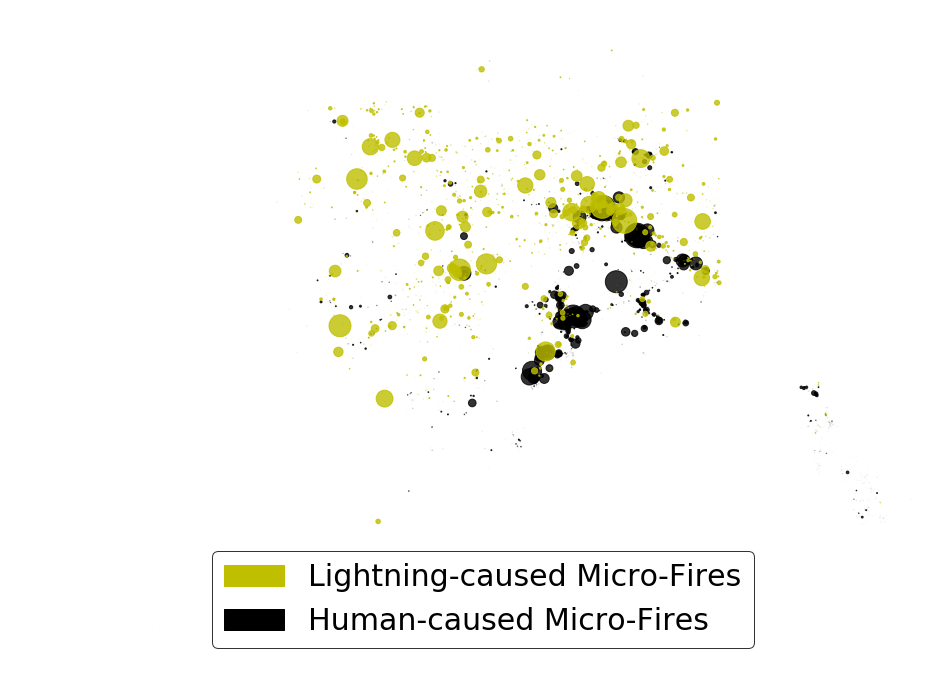

In [29]:
plt.figure(figsize=(16,12))

x=plt_df[(plt_df['FIRE_SIZE']<100)&(plt_df['STAT_CAUSE_DESCR']=='Lightning')]['LONGITUDE']
y=plt_df[(plt_df['FIRE_SIZE']<100)&(plt_df['STAT_CAUSE_DESCR']=='Lightning')]['LATITUDE']
x1=plt_df[(plt_df['FIRE_SIZE']<100)&(plt_df['STAT_CAUSE_DESCR']!='Lightning')]['LONGITUDE']
y1=plt_df[(plt_df['FIRE_SIZE']<100)&(plt_df['STAT_CAUSE_DESCR']!='Lightning')]['LATITUDE']

plt.scatter(x1,y1,color='k',s=(plt_df['FIRE_SIZE']/1000), alpha=.8)
plt.scatter(x,y,color='y',s=(plt_df['FIRE_SIZE']/1000), alpha=.8)

plt.axis('off')

red_patch = mpatches.Patch(color='y', label='Lightning-caused Micro-Fires')
black_patch = mpatches.Patch(color='k', label='Human-caused Micro-Fires')
plt.legend(handles=[red_patch, black_patch], loc=8, prop={'size': 30}, edgecolor='k')


plt.xlim(-180, -129)
plt.ylim(51, 71)

plt.show()

In [38]:
exclude = ['AK', 'HI', 'PR']
lower_48 = df_orig[~df_orig['STATE'].isin(exclude)]
#plt_df = df_orig[(~df_orig['STATE'].isin(exclude)) & (df['STAT_CAUSE_DESCR']=='Lightning')]

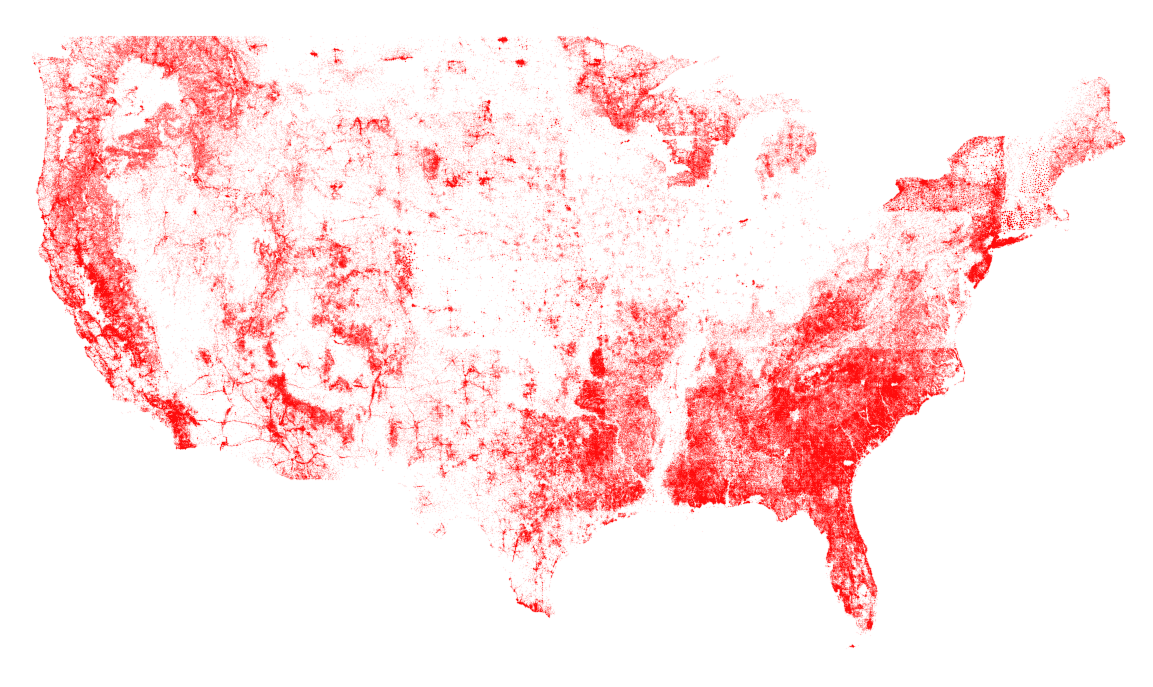

In [40]:
plt.figure(figsize=(20,12))

x=lower_48['LONGITUDE']
y=lower_48['LATITUDE']

plt.scatter(x,y,color='r',s=.1,alpha=.1)

plt.xlim(-125, -66)
plt.ylim(24, 50)
plt.axis('off')
plt.show()

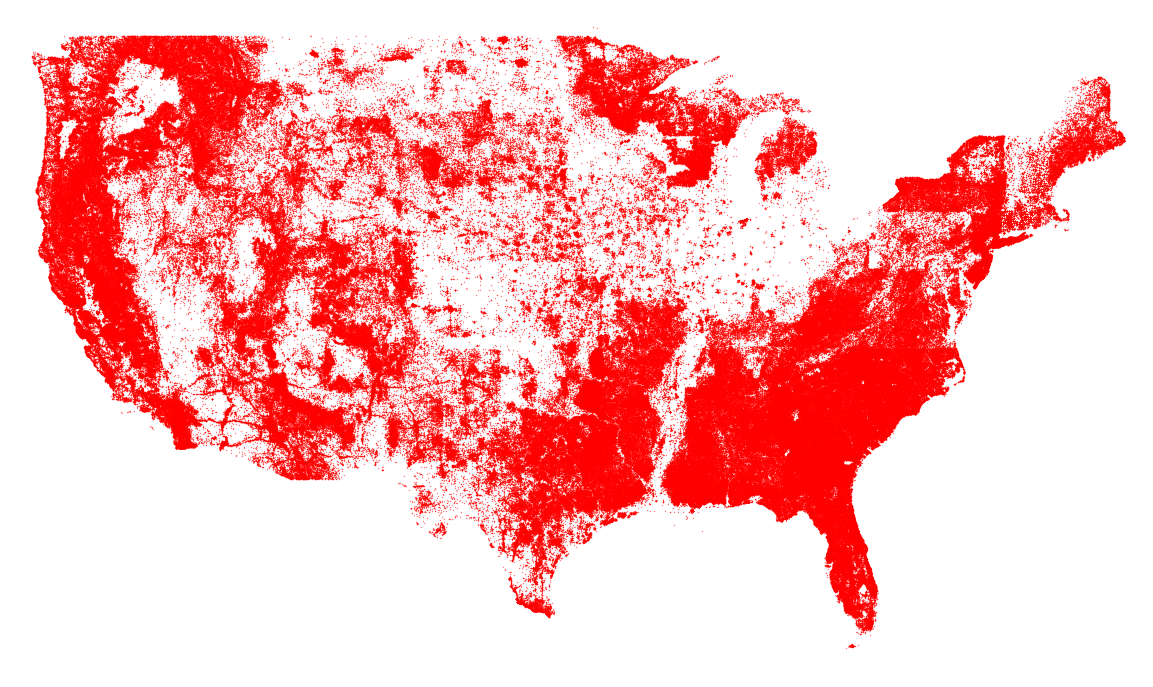

In [41]:
plt.figure(figsize=(20,12))

x=lower_48['LONGITUDE']
y=lower_48['LATITUDE']

plt.scatter(x,y,color='r',s=.1,alpha=.75)

plt.xlim(-125, -66)
plt.ylim(24, 50)
plt.axis('off')
plt.show()

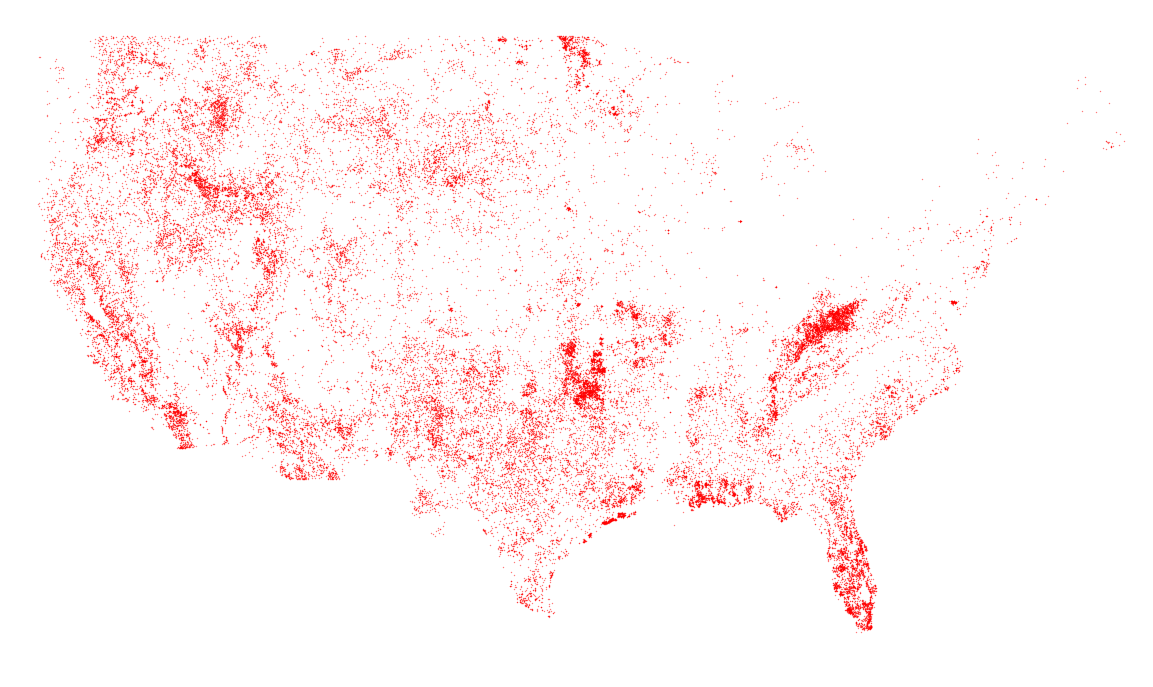

In [43]:
plt.figure(figsize=(20,12))

x=lower_48[lower_48['FIRE_SIZE']>100]['LONGITUDE']
y=lower_48[lower_48['FIRE_SIZE']>100]['LATITUDE']

plt.scatter(x,y,color='r',s=.1,alpha=.75)

plt.xlim(-125, -66)
plt.ylim(24, 50)
plt.axis('off')
plt.show()

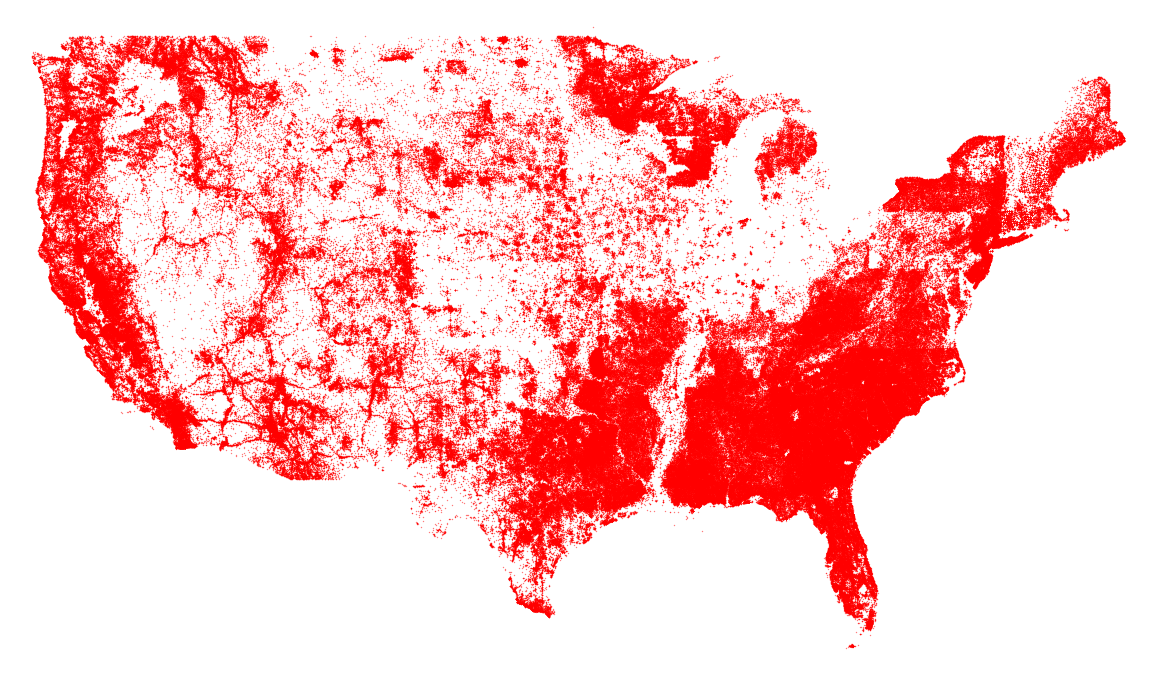

In [45]:
plt.figure(figsize=(20,12))

x=lower_48[lower_48['STAT_CAUSE_DESCR']!='Lightning']['LONGITUDE']
y=lower_48[lower_48['STAT_CAUSE_DESCR']!='Lightning']['LATITUDE']

plt.scatter(x,y,color='r',s=.1,alpha=.75)

plt.xlim(-125, -66)
plt.ylim(24, 50)
plt.axis('off')
plt.show()

In [38]:
west = ['OR', 'WA']

pnw_df = df_orig[df_orig['STATE'].isin(west)]

pnw_df.to_pickle('pnw_df.pkl')

In [40]:
west_df_big = west_df[west_df['FIRE_SIZE'] > 100]

NameError: name 'west_df' is not defined

In [41]:
# import pickle
# pickle_out = open('ak_fires.pkl', 'wb')
# pickle.dump(df_orig, pickle_out)
# pickle_out.close()

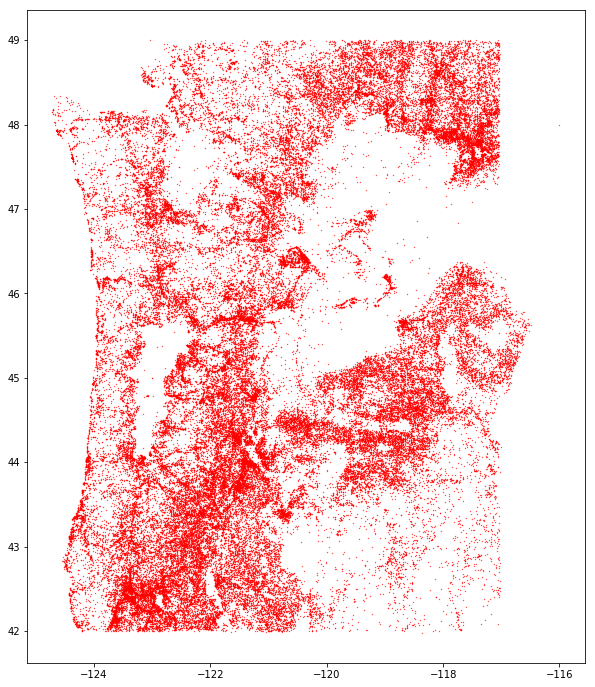

In [42]:
plt.figure(figsize=(10,12))

x=pnw_df['LONGITUDE']
y=pnw_df['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

# barplots

In [43]:
years = pd.Series.to_frame(west_df['YEAR'].value_counts()).sort_index()

plt.bar(years.index, years['YEAR'])

NameError: name 'west_df' is not defined

In [44]:
mth = list(df_orig['MONTH'])
yr = list(df_orig['YEAR'])

mthyr = []
for idx, m in enumerate(mth):
    mthyr.append(str(yr[idx]) + '-' + str(mth[idx]))

df_orig['MTHYR'] = mthyr

<Container object of 288 artists>

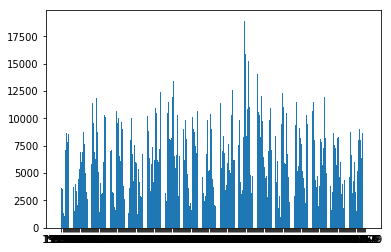

In [45]:
mthyears = pd.Series.to_frame(df_orig['MTHYR'].value_counts()).sort_index()

plt.bar(mthyears.index, mthyears['MTHYR'])

In [46]:
plt.figure(figsize=(20,12))

x=west_df_big['LONGITUDE']
y=west_df_big['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

NameError: name 'west_df_big' is not defined

In [47]:
west_df_big['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='r')
plt.show()

NameError: name 'west_df_big' is not defined

In [48]:
years = pd.Series.to_frame(west_df_big['YEAR'].value_counts()).sort_index()

plt.bar(years.index, years['YEAR'])

NameError: name 'west_df_big' is not defined

In [49]:
mth = list(df_orig_big['MONTH'])
yr = list(df_orig_big['YEAR'])

mthyr = []
for idx, m in enumerate(mth):
    mthyr.append(str(yr[idx]) + '-' + str(mth[idx]))

df_orig_big['MTHYR'] = mthyr

NameError: name 'df_orig_big' is not defined

In [50]:
mthyears = pd.Series.to_frame(df_orig_big['MTHYR'].value_counts()).sort_index()

plt.bar(mthyears.index, mthyears['MTHYR'])

NameError: name 'df_orig_big' is not defined

In [51]:
plt.bar(ak_df.groupby('YEAR').sum().index, ak_df.groupby('YEAR').sum()['FIRE_SIZE'])

NameError: name 'ak_df' is not defined

<Container object of 24 artists>

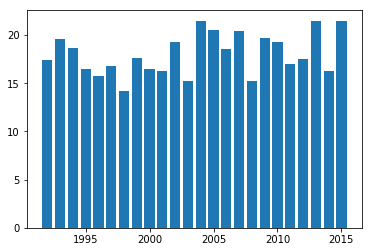

In [52]:
plt.bar(weather.groupby('YEAR').sum().index, weather.groupby('YEAR').mean()['tmax_5'])

In [53]:
plt.bar(west_df_big.groupby('YEAR').sum().index, west_df_big.groupby('YEAR').sum()['FIRE_SIZE'])

NameError: name 'west_df_big' is not defined

In [54]:
np.mean((west_df.groupby('YEAR').sum()['FIRE_SIZE'] - west_df_big.groupby('YEAR').sum()['FIRE_SIZE'])/west_df.groupby('YEAR').sum()['FIRE_SIZE'])

NameError: name 'west_df' is not defined

on average, fires less than 100 acres in size in AK account half a percent of the area burned in a given year, max is ~3.3% in 1995

in us west, fires under 100 acres account for ~2.864% of area burned

In [89]:
import seaborn as sns
import scipy
import statsmodels

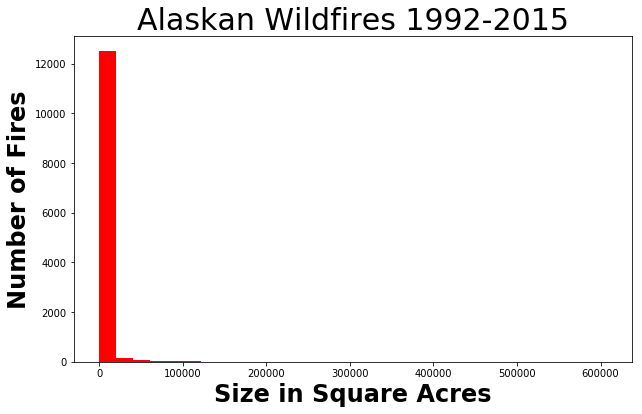

In [104]:
plt.figure(figsize=(10,6))

plt.title('Alaskan Wildfires 1992-2015', fontsize=30)
plt.xlabel('Size in Square Acres', fontweight='bold', fontsize=24)
plt.ylabel('Number of Fires', fontweight='bold', fontsize=24)

plt.hist(plt_df['FIRE_SIZE'], bins=30, color='r');

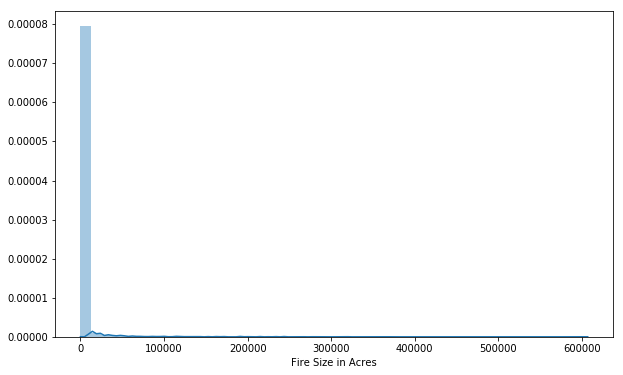

In [62]:
plt.figure(figsize=(10,6))

sns.distplot(plt_df['FIRE_SIZE'], axlabel='Fire Size in Acres')

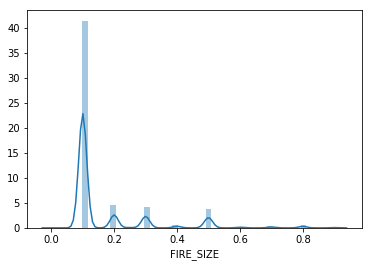

In [63]:
sns.distplot(plt_df[plt_df['FIRE_SIZE'] < 1]['FIRE_SIZE'])

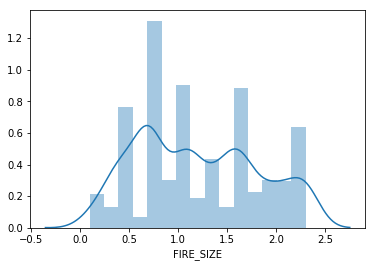

In [65]:
sns.distplot(plt_df[(plt_df['FIRE_SIZE'] <= 10) & (plt_df['FIRE_SIZE'] > 1)]['FIRE_SIZE'].apply(np.log))

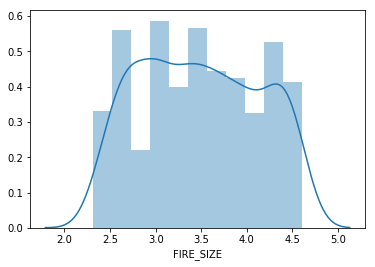

In [66]:
sns.distplot(plt_df[(plt_df['FIRE_SIZE'] <= 100) & (plt_df['FIRE_SIZE'] > 10)]['FIRE_SIZE'].apply(np.log))

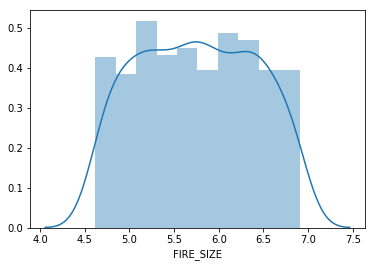

In [68]:
sns.distplot(plt_df[(plt_df['FIRE_SIZE'] <= 1000) & (plt_df['FIRE_SIZE'] > 100)]['FIRE_SIZE'].apply(np.log))

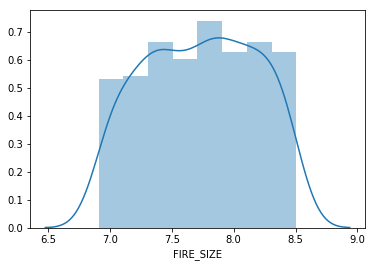

In [69]:
sns.distplot(plt_df[(plt_df['FIRE_SIZE'] <= 5000) & (plt_df['FIRE_SIZE'] > 1000)]['FIRE_SIZE'].apply(np.log))

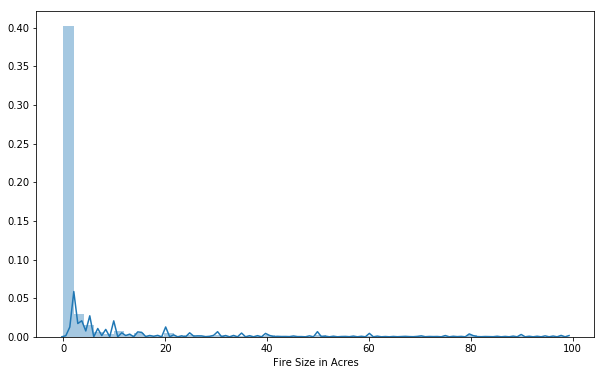

In [70]:
plt.figure(figsize=(10,6))
sns.distplot(plt_df[(plt_df['FIRE_SIZE'] < 100)]['FIRE_SIZE'], axlabel='Fire Size in Acres')

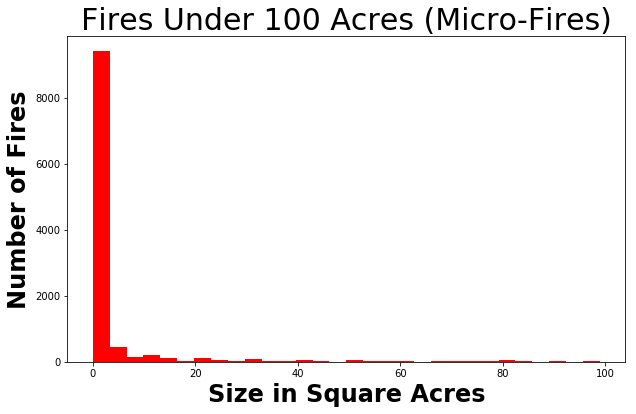

In [105]:
plt.figure(figsize=(10,6))

plt.title('Fires Under 100 Acres (Micro-Fires)', fontsize=30)
plt.xlabel('Size in Square Acres', fontweight='bold', fontsize=24)
plt.ylabel('Number of Fires', fontweight='bold', fontsize=24)

plt.hist(plt_df[(plt_df['FIRE_SIZE'] < 100)]['FIRE_SIZE'], bins=30, color='r');

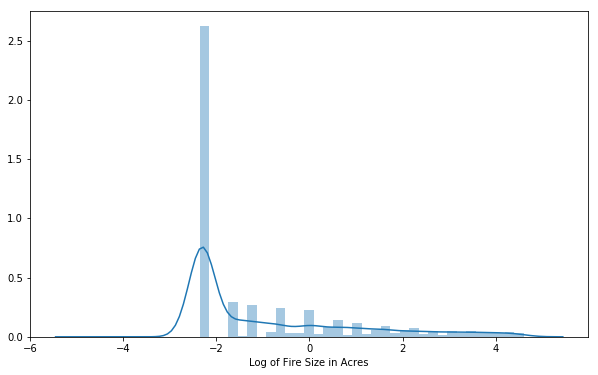

In [71]:
plt.figure(figsize=(10,6))
sns.distplot(plt_df[(plt_df['FIRE_SIZE'] < 100)]['FIRE_SIZE'].apply(np.log), axlabel='Log of Fire Size in Acres')

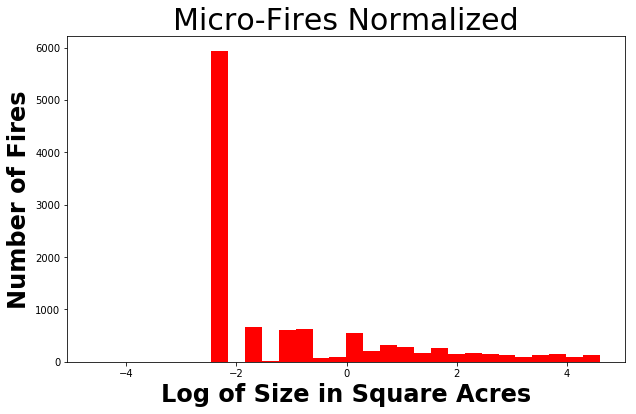

In [27]:
plt.figure(figsize=(10,6))

plt.title('Micro-Fires Normalized', fontsize=30)
plt.xlabel('Log of Size in Square Acres', fontweight='bold', fontsize=24)
plt.ylabel('Number of Fires', fontweight='bold', fontsize=24)

plt.hist(plt_df[(plt_df['FIRE_SIZE'] < 100)]['FIRE_SIZE'].apply(np.log), bins=30, color='r');

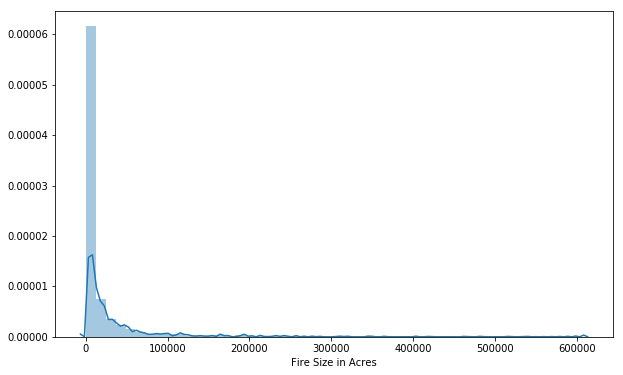

In [72]:
plt.figure(figsize=(10,6))
sns.distplot(plt_df[plt_df['FIRE_SIZE'] > 100]['FIRE_SIZE'], axlabel='Fire Size in Acres')

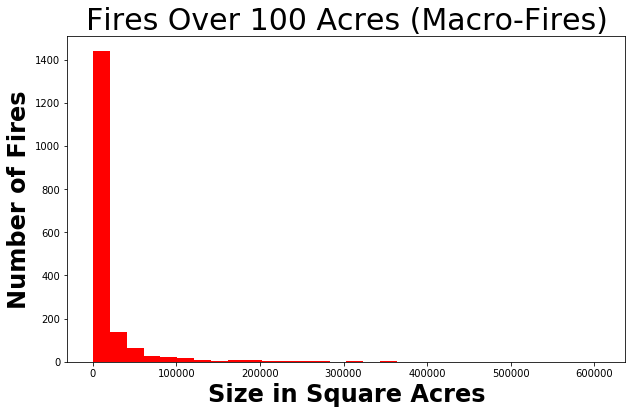

In [106]:
plt.figure(figsize=(10,6))

plt.title('Fires Over 100 Acres (Macro-Fires)', fontsize=30)
plt.xlabel('Size in Square Acres', fontweight='bold', fontsize=24)
plt.ylabel('Number of Fires', fontweight='bold', fontsize=24)

plt.hist(plt_df[(plt_df['FIRE_SIZE'] > 100)]['FIRE_SIZE'], bins=30, color='r');

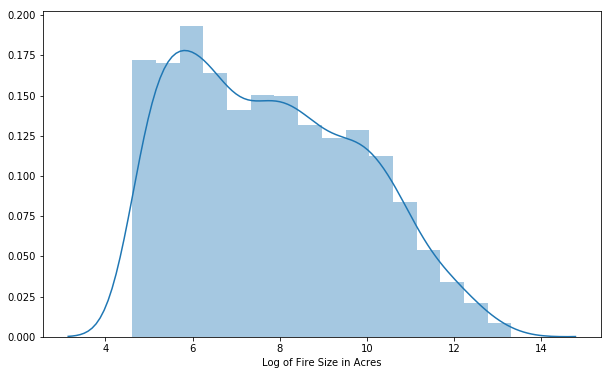

In [73]:
plt.figure(figsize=(10,6))
sns.distplot(plt_df[plt_df['FIRE_SIZE'] > 100]['FIRE_SIZE'].apply(np.log), axlabel='Log of Fire Size in Acres')

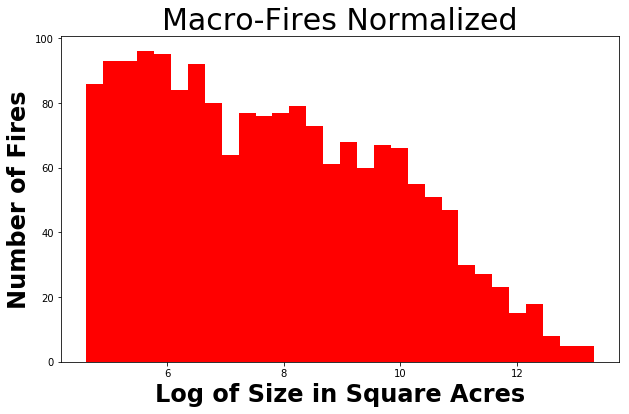

In [28]:
plt.figure(figsize=(10,6))

plt.title('Macro-Fires Normalized', fontsize=30)
plt.xlabel('Log of Size in Square Acres', fontweight='bold', fontsize=24)
plt.ylabel('Number of Fires', fontweight='bold', fontsize=24)

plt.hist(plt_df[(plt_df['FIRE_SIZE'] > 100)]['FIRE_SIZE'].apply(np.log), bins=30, color='r');

In [75]:
print(scipy.stats.normaltest(plt_df[(plt_df['FIRE_SIZE'] < 5000) & (plt_df['FIRE_SIZE'] >0.1)]['FIRE_SIZE'].apply(np.log)))
print(scipy.stats.normaltest(plt_df[plt_df['FIRE_SIZE'] > 5000]['FIRE_SIZE'].apply(np.log)))

NormaltestResult(statistic=618.3076536691144, pvalue=5.44752141853518e-135)
NormaltestResult(statistic=38.58520299585325, pvalue=4.181476187179401e-09)


In [76]:
len(plt_df[plt_df['FIRE_SIZE'] > 100])/len(plt_df)

0.13789613018765087

In [77]:
len(plt_df[plt_df['FIRE_SIZE'] > 1000])

1056

In [79]:
plt_df.describe()

,LATITUDE,LONGITUDE,DISCOVERY_DATE,FIRE_SIZE,MONTH,YEAR
count,12843.000000,12843.000000,1.284300e+04,12843.000000,12843.000000,12843.000000
mean,62.968859,-149.166935,2.452900e+06,2509.779198,6.079421,2003.249942
std,2.476771,5.677232,2.628712e+03,19600.650646,1.292009,7.198520
min,51.531800,-178.802600,2.448716e+06,0.010000,1.000000,1992.000000
25%,61.521475,-151.266662,2.450574e+06,0.100000,5.000000,1997.000000
50%,63.183300,-149.224600,2.452860e+06,0.200000,6.000000,2003.000000
75%,64.833415,-146.804300,2.455338e+06,5.000000,7.000000,2010.000000
max,70.330600,-130.050833,2.457360e+06,606945.000000,12.000000,2015.000000
